# Computer Lab 2 — continued ...

Work through Part 3 of the "Second Computer Lab" (Chapter 7) in _A Student's Guide to Python._  This exercise focuses on the Poisson distribution and waiting times.

You can use this notebook to store your code, plots, and notes, or you can write a ___script___ (see Section 3.3) that will carry out the analysis and produce the plots, and simply write your comments and observations in this notebook.  If you write a script, it should save your plot with the data and your best fit to a PDF, JPG, or PNG in this folder when it runs.

In [1]:
# Garrett Allen
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from scipy.special import binom
from numpy import random
from scipy.stats import norm
import math
from scipy.stats import stats

In [2]:
n = 100
p_h = 0.08
mean = n*p_h
x = 8

p_x = math.exp(-mean)*((mean**x)/(ss.factorial(x)))
print("Probability you will get ",x ,"heads when you flip ",n ,"times:",p_x)

Probability you will get  8 heads when you flip  100 times: 0.13958653195059692


Text(0.5, 1.0, 'Poisson')

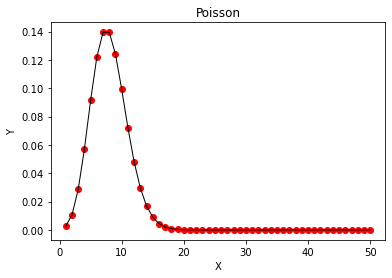

In [3]:
x = np.linspace(1,50,50)
p_x = math.exp(-mean)*((mean**x)/(ss.factorial(x)))

plt.plot(x,p_x,'ro')
plt.plot(x,p_x,linewidth=1, color='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Poisson")




In [4]:
nflips = 100
ntrials = 1000

trials_heads = []

for j in range(ntrials):
    fsum = []
    
    for i in range(nflips):
        
        flip = np.random.uniform(low=0, high=1)
        flip_outcome = 0
        
        if flip < (0.08):
            flip_outcome = 1
            
        fsum = np.append(fsum,[flip_outcome])

    num_heads = sum(fsum)

    #print(fsum)
    #print(num_heads)

    trials_heads = np.append(trials_heads,[num_heads])
    
#print(trials_heads)

    
    
    

SD =  2.7217457632923763
Mean =  8.0


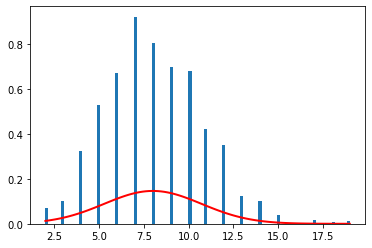

In [5]:
sd = np.std(trials_heads)
bins = 100

count, bins, ignored = plt.hist(trials_heads, bins, density=True)
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sd**2) ),
         linewidth=2, color='r')

print("SD = ",sd)
print("Mean = ",mean)

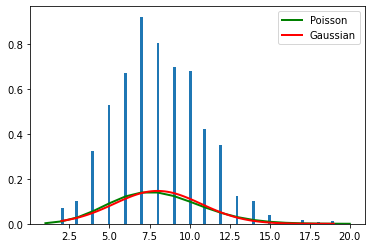

In [6]:
x = np.linspace(1,20,20)
p_x = math.exp(-mean)*((mean**x)/(ss.factorial(x)))

count, bins, ignored = plt.hist(trials_heads, bins, density=True)
plt.plot(x,p_x,linewidth=2, color='g')
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sd**2) ),
         linewidth=2, color='r')
plt.legend(['Poisson', 'Gaussian'])

In [27]:
nflips = 100000

fsum = []
for i in range(nflips):
        
    flip = np.random.uniform(low=0, high=1)
    flip_outcome = 0
        
    if flip < (0.08):
        flip_outcome = 1
            
    fsum = np.append(fsum,[flip_outcome])

#print(fsum)

In [28]:
one_diff = np.nonzero(fsum)
#print(one_diff)

In [29]:
spaces = np.diff(one_diff)
flat = spaces.flatten()
#print(flat)

In [30]:
mode = stats.mode(flat)
print(mode[0])

[1]


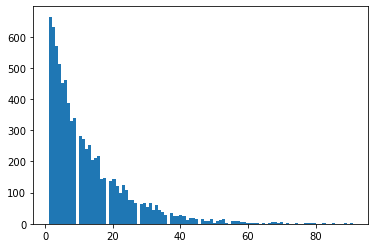

In [31]:
hist = plt.hist(flat,bins=100)

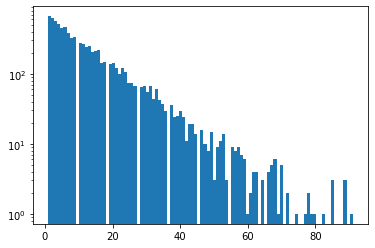

In [32]:
hist = plt.hist(flat,bins=100)
plt.yscale('log',base=10) 

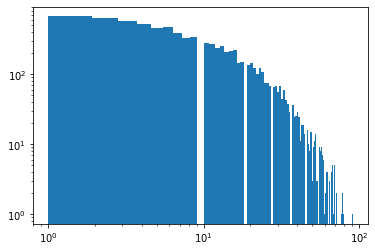

In [33]:
hist = plt.hist(flat,bins=100)
plt.yscale('log',base=10) 
plt.xscale('log',base=10) 

In [34]:
#I have no idea why the most common space between heads would be 1
#I thought it would be 8.